In [25]:
transform = transforms.Compose([
    transforms.Resize((image_shape, image_shape)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
                          ])

image = transform(Image.open('1.jpg')).unsqueeze(0)

(64, 300, 300)


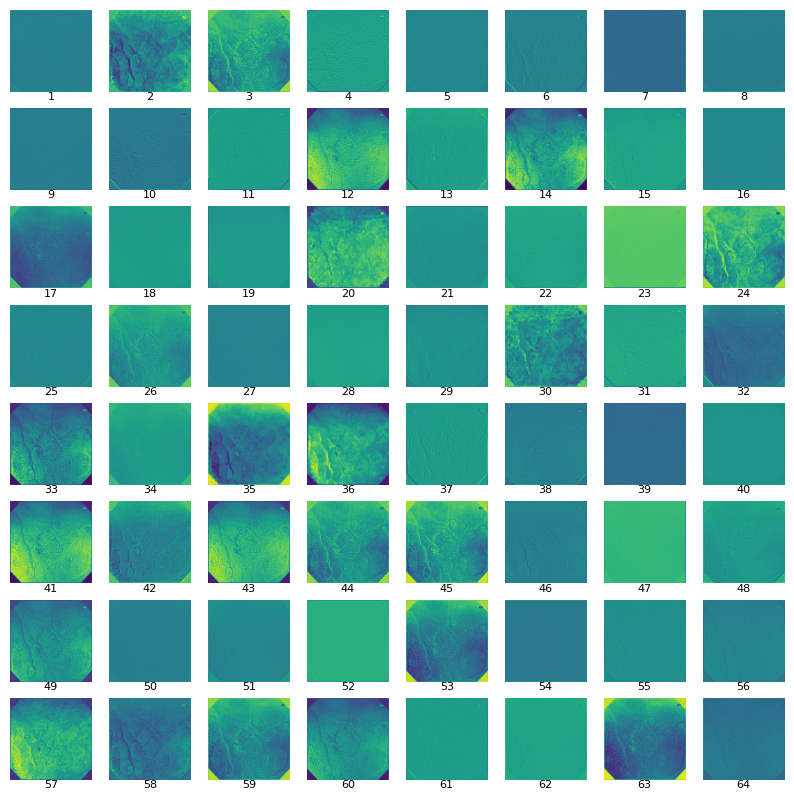

In [26]:
features = model.conv1(image)
feature_map = features[0].detach().numpy()

print(feature_map.shape)

row = 8
col = 8

fig, ax = plt.subplots(row, col, figsize=(10, 10))
for i in range(row):
    for j in range(col):
        ax[i, j].imshow(feature_map[i * col + j], cmap='viridis')
        ax[i, j].axis('off')
        # ax[i, j].set_title(f'{i * col + j + 1}', 
        #                    fontsize=8, loc='left')
        ax[i, j].text(0.5, -0.1, str(i * col + j + 1), 
                      fontsize=8, transform=ax[i, j].transAxes, 
                      ha='center') 


plt.savefig('conv1.png')
plt.show()

14   13


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

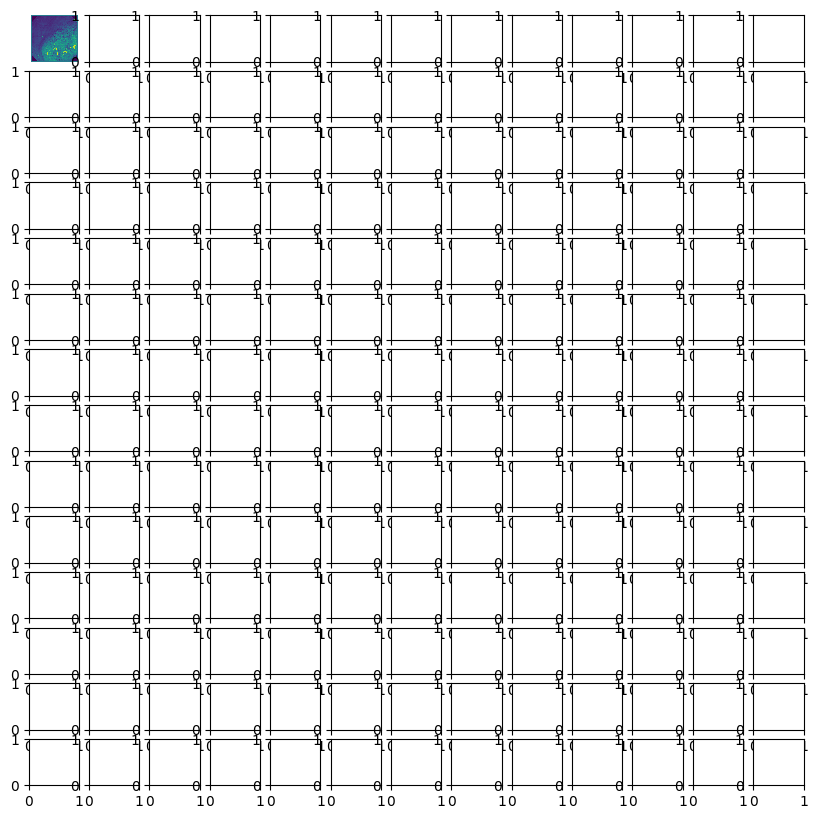

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import os

image_path = '2.jpg'
filename, _ = os.path.splitext(image_path)

model = ResNet50(weights='imagenet')
layer_outputs = [layer.output for layer in model.layers[1:]]  # 获取所有层的输出
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)  # 创建新的模型

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_image = tf.keras.preprocessing.image.img_to_array(image)
input_image = np.expand_dims(input_image, axis=0)
input_image = preprocess_input(input_image)

activations = activation_model.predict(input_image)
save_folder = 'result_' + filename + '/'
os.makedirs(save_folder, exist_ok=True)

residual_outputs = activation_model.predict(input_image)

# rows = int(np.sqrt(len(activations))) 
# cols = len(activations) // rows  
rows = 14
cols = 13

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
print(rows, " ", cols)

# 遍历并绘制每一个特征图
for i, activation in enumerate(activations):
    row = i // cols
    col = i % cols

    axes[row, col].matshow(activation[0, :, :, 0], cmap='viridis')
    # axes[row, col].set_title(f"Layer {i+1}")
    axes[row, col].axis('off')

    # 单独保存每个特征图
    save_path = os.path.join(save_folder, f"feature_map_{i+1}.png")
    # plt.colorbar()
    plt.imsave(save_path, activation[0, :, :, 0], cmap='viridis')


# 移除多余的子图
if len(activations) < (rows * cols):
    for j in range(len(activations), rows * cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()